In [11]:
import requests
import os
import re
import json
import urllib
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from selenium import webdriver
import time
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

## IMDB

In [2]:
french_movies = 'https://www.imdb.com/search/title/?title_type=feature&release_date=2019-01-01,2019-12-31&countries=fr&languages=fr'

In [80]:
# french_movies = 'https://www.imdb.com/search/title/?title_type=feature&release_date=2019-01-01,2019-12-31&countries=fr&languages=fr&start=301&ref_=adv_nxt'

In [3]:
headers = {'Accept-Language': 'en',
           'X-FORWARDED-FOR': '2.21.184.0'}

In [4]:
response = requests.get(french_movies, headers=headers)
print(response.status_code)

200


In [61]:
urllib.parse.urljoin(french_movies, "/title/tt8613070/")

'https://www.imdb.com/title/tt8613070/'

In [103]:
soup = BeautifulSoup(response.text)

In [ ]:
soup.unwr

In [88]:
soup.find_all('a', attrs={'class': 'next-page'})[0]['href']

'/search/title/?title_type=feature&release_date=2019-01-01,2019-12-31&countries=fr&languages=fr&start=51'

In [5]:
def get_link_to_next_page(soup):
    links = soup.find_all('a', attrs={'class': 'next-page'})
    if len(links) == 0:
        return None
    else:
        link = links[0]['href']
        return link

In [6]:
def get_links_to_movies(soup):
    h3s = soup.find_all('h3', attrs={'class': "lister-item-header"})
    movie_links = {el.find('a').text: el.find('a')['href'] for el in h3s}
    return movie_links

In [7]:
def get_all_links(url):
    headers = {'Accept-Language': 'en',
               'X-FORWARDED-FOR': '2.21.184.0'}
    
    all_movies_links = {}
    
    while True:
        response = requests.get(url, headers=headers)
        assert response.status_code == 200
        soup = BeautifulSoup(response.text)
        movie_links = get_links_to_movies(soup)
        movie_links = {movie: urllib.parse.urljoin(url, movie_link) for (movie, movie_link) in movie_links.items()}
        all_movies_links.update(movie_links)
        
        link = get_link_to_next_page(soup)
        if not link:
            return all_movies_links
        url = urllib.parse.urljoin(url, link)
        time.sleep(1)

In [12]:
all_movies_links = get_all_links(french_movies)

In [13]:
with open('all_movies_links', 'wb') as f:
    pickle.dump(all_movies_links, f)

In [243]:
all_movies_links

{'Portrait of a Lady on Fire': 'https://www.imdb.com/title/tt8613070/',
 'Anna': 'https://www.imdb.com/title/tt7456310/',
 'Les Misérables': 'https://www.imdb.com/title/tt10199590/',
 'Les traducteurs': 'https://www.imdb.com/title/tt6270534/',
 'An Officer and a Spy': 'https://www.imdb.com/title/tt2398149/',
 'Proxima': 'https://www.imdb.com/title/tt7374926/',
 'Curiosa': 'https://www.imdb.com/title/tt7598076/',
 'La Belle Époque': 'https://www.imdb.com/title/tt9172422/',
 'I Lost My Body': 'https://www.imdb.com/title/tt9806192/',
 'Domino': 'https://www.imdb.com/title/tt3282076/',
 'The Truth': 'https://www.imdb.com/title/tt8323120/',
 'Matthias & Maxime': 'https://www.imdb.com/title/tt8767908/',
 'The Operative': 'https://www.imdb.com/title/tt8000718/',
 'The Specials': 'https://www.imdb.com/title/tt8655470/',
 'Lucky Day': 'https://www.imdb.com/title/tt7248248/',
 "The Wolf's Call": 'https://www.imdb.com/title/tt7458762/',
 'Atlantics': 'https://www.imdb.com/title/tt10199586/',
 'It

In [107]:
len(all_movies_links)

313

In [110]:
all_movies_links['Maudit']

'https://www.imdb.com/title/tt11374224/'

In [115]:
response = requests.get('https://www.imdb.com/title/tt8613070/', headers=headers)
print(response.status_code)
soup = BeautifulSoup(response.text)

200


In [161]:
soup.find('time', attrs={'datetime': True})['datetime']

'PT122M'

In [162]:
re.findall(re.compile('\d+'), soup.find('time', attrs={'datetime': True})['datetime'])

['122']

In [131]:
int(soup.find(text='Cumulative Worldwide Gross:').parent.parent.text.split('$')[-1].strip().replace(',', ''))

9912433

In [135]:
soup.find(text='Cumulative Worldwide Gross:')

'Cumulative Worldwide Gross:'

In [142]:
reviews[0].text

'271 user'

In [152]:
int(re.match(re.compile('\d+'), reviews[0].text).group())

'271'

In [153]:
reviews

[<a href="reviews">271 user</a>, <a href="externalreviews">242 critic</a>]

In [155]:
reviews_user = int(re.match(re.compile('\d+'), reviews[0].text).group())
reviews_critoc = int(re.match(re.compile('\d+'), reviews[1].text).group())

In [156]:
reviews_critoc

242

In [175]:
get_movie_stat(soup)

(8.1, 42028.0, 95.0, 9912433, 271, 242, 122)

In [167]:
reviews = soup.find('div', text="""
        Reviews
        """).parent.find_all('a')

In [173]:
soup.find('div', text=re.compile("\s*Reviews\s*"))

<div>
        Reviews
        </div>

In [168]:
reviews_user = int(re.match(re.compile('\d+'), reviews[0].text).group())
reviews_critic = int(re.match(re.compile('\d+'), reviews[1].text).group())

In [174]:
def get_movie_stat(movie_soup):
    
    try:
        ratingValue = movie_soup.find('span', attrs={'itemprop': 'ratingValue'})
        if ratingValue: 
                ratingValue = float(ratingValue.text)
    except:
        ratingValue = np.nan
    
    try:
        ratingCount = movie_soup.find('span', attrs={'itemprop': 'ratingCount'})
        if ratingCount: 
                ratingCount = float(ratingCount.text.replace(',', ''))
    except:
        ratingCount = np.nan
        
    try:
        metacriticScore = movie_soup.find('div', attrs={'class': 'metacriticScore'})
        if metacriticScore:
            metacriticScore = float(metacriticScore.find('span').text)
    except:
        metacriticScore = np.nan
        
    
    try:    
        money = movie_soup.find(text='Cumulative Worldwide Gross:')
        if money:
            money = int(movie_soup.find(text='Cumulative Worldwide Gross:').parent.parent.text.split('$')[-1].strip().replace(',', ''))
    except:
        money = np.nan
    
    try:
        reviews = movie_soup.find('div', text=re.compile("\s*Reviews\s*")).parent.find_all('a')
        reviews_user = int(re.match(re.compile('\d+'), reviews[0].text).group())
        reviews_critic = int(re.match(re.compile('\d+'), reviews[1].text).group())
    except:
        reviews_user, reviews_critic = np.nan, np.nan

    try:
        minutes = int(re.findall(re.compile('\d+'), movie_soup.find('time', attrs={'datetime': True})['datetime'])[0])
    except:
        minutes = np.nan
    
    return ratingValue, ratingCount, metacriticScore, money, reviews_user, reviews_critic, minutes

In [176]:
all_movies_links

{'Portrait of a Lady on Fire': 'https://www.imdb.com/title/tt8613070/',
 'Anna': 'https://www.imdb.com/title/tt7456310/',
 'Les Misérables': 'https://www.imdb.com/title/tt10199590/',
 'Les traducteurs': 'https://www.imdb.com/title/tt6270534/',
 'An Officer and a Spy': 'https://www.imdb.com/title/tt2398149/',
 'Proxima': 'https://www.imdb.com/title/tt7374926/',
 'Curiosa': 'https://www.imdb.com/title/tt7598076/',
 'La Belle Époque': 'https://www.imdb.com/title/tt9172422/',
 'I Lost My Body': 'https://www.imdb.com/title/tt9806192/',
 'Domino': 'https://www.imdb.com/title/tt3282076/',
 'The Truth': 'https://www.imdb.com/title/tt8323120/',
 'Matthias & Maxime': 'https://www.imdb.com/title/tt8767908/',
 'The Operative': 'https://www.imdb.com/title/tt8000718/',
 'The Specials': 'https://www.imdb.com/title/tt8655470/',
 'Lucky Day': 'https://www.imdb.com/title/tt7248248/',
 "The Wolf's Call": 'https://www.imdb.com/title/tt7458762/',
 'Atlantics': 'https://www.imdb.com/title/tt10199586/',
 'It

In [206]:
def get_all_movies_stat(all_movies_links, verbose=False):
    columns = ['title', 'ratingValue', 'ratingCount',
               'metacriticScore', 'money', 'reviews_user', 'reviews_critic', 'minutes']
    data = []
    done = 0
    start = time.time()
    for movie, url in all_movies_links.items():
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text)
            movies_stat = list(get_movie_stat(soup))
            data.append([movie] + movies_stat)
            if verbose:
                done += 1
                print(f'Done with {done} movies. There are {len(all_movies_links) - done} more left. Spend {(time.time() - start):.1f} seconds')
            time.sleep(1)
        else:
            data.append([movie] + [np.nan] * 7)
            time.sleep(5)
    return pd.DataFrame(data=data, columns=columns)

In [202]:
x = 123123.12312312

In [203]:
f'{x:.2f}'

'123123.12'

In [204]:
temp = {}
for movie in list(all_movies_links.keys())[:10]:
    temp[movie] = all_movies_links[movie]

In [207]:
data = get_all_movies_stat(temp, verbose=1)

Done with 1 movies. There are 9 more left. Spend 1.6 seconds
Done with 2 movies. There are 8 more left. Spend 3.9 seconds
Done with 3 movies. There are 7 more left. Spend 6.1 seconds
Done with 4 movies. There are 6 more left. Spend 10.4 seconds
Done with 5 movies. There are 5 more left. Spend 12.6 seconds
Done with 6 movies. There are 4 more left. Spend 14.8 seconds
Done with 7 movies. There are 3 more left. Spend 16.9 seconds
Done with 8 movies. There are 2 more left. Spend 19.0 seconds
Done with 9 movies. There are 1 more left. Spend 21.6 seconds
Done with 10 movies. There are 0 more left. Spend 23.6 seconds


In [209]:
data = get_all_movies_stat(all_movies_links, verbose=1)

Done with 1 movies. There are 312 more left. Spend 1.6 seconds
Done with 2 movies. There are 311 more left. Spend 3.8 seconds
Done with 3 movies. There are 310 more left. Spend 6.0 seconds
Done with 4 movies. There are 309 more left. Spend 8.2 seconds
Done with 5 movies. There are 308 more left. Spend 10.4 seconds
Done with 6 movies. There are 307 more left. Spend 12.6 seconds
Done with 7 movies. There are 306 more left. Spend 14.7 seconds
Done with 8 movies. There are 305 more left. Spend 17.0 seconds
Done with 9 movies. There are 304 more left. Spend 19.4 seconds
Done with 10 movies. There are 303 more left. Spend 21.8 seconds
Done with 11 movies. There are 302 more left. Spend 23.9 seconds
Done with 12 movies. There are 301 more left. Spend 26.4 seconds
Done with 13 movies. There are 300 more left. Spend 28.6 seconds
Done with 14 movies. There are 299 more left. Spend 30.8 seconds
Done with 15 movies. There are 298 more left. Spend 32.8 seconds
Done with 16 movies. There are 297 mor

Done with 126 movies. There are 187 more left. Spend 310.6 seconds
Done with 127 movies. There are 186 more left. Spend 313.1 seconds
Done with 128 movies. There are 185 more left. Spend 316.0 seconds
Done with 129 movies. There are 184 more left. Spend 318.7 seconds
Done with 130 movies. There are 183 more left. Spend 321.5 seconds
Done with 131 movies. There are 182 more left. Spend 324.0 seconds
Done with 132 movies. There are 181 more left. Spend 327.3 seconds
Done with 133 movies. There are 180 more left. Spend 329.9 seconds
Done with 134 movies. There are 179 more left. Spend 332.4 seconds
Done with 135 movies. There are 178 more left. Spend 334.8 seconds
Done with 136 movies. There are 177 more left. Spend 337.3 seconds
Done with 137 movies. There are 176 more left. Spend 339.9 seconds
Done with 138 movies. There are 175 more left. Spend 342.7 seconds
Done with 139 movies. There are 174 more left. Spend 345.6 seconds
Done with 140 movies. There are 173 more left. Spend 348.3 sec

Done with 249 movies. There are 64 more left. Spend 634.3 seconds
Done with 250 movies. There are 63 more left. Spend 636.7 seconds
Done with 251 movies. There are 62 more left. Spend 638.9 seconds
Done with 252 movies. There are 61 more left. Spend 641.7 seconds
Done with 253 movies. There are 60 more left. Spend 644.2 seconds
Done with 254 movies. There are 59 more left. Spend 646.5 seconds
Done with 255 movies. There are 58 more left. Spend 648.8 seconds
Done with 256 movies. There are 57 more left. Spend 651.5 seconds
Done with 257 movies. There are 56 more left. Spend 653.8 seconds
Done with 258 movies. There are 55 more left. Spend 656.3 seconds
Done with 259 movies. There are 54 more left. Spend 658.8 seconds
Done with 260 movies. There are 53 more left. Spend 661.1 seconds
Done with 261 movies. There are 52 more left. Spend 663.7 seconds
Done with 262 movies. There are 51 more left. Spend 666.1 seconds
Done with 263 movies. There are 50 more left. Spend 668.5 seconds
Done with 

In [215]:
data[data['reviews_user'] > 1]

,title,ratingValue,ratingCount,metacriticScore,money,reviews_user,reviews_critic,minutes
0,Portrait of a Lady on Fire,8.1,42028.0,95.0,9912433.0,271.0,242.0,122.0
1,Anna,6.6,51538.0,40.0,31640190.0,608.0,127.0,118.0
2,Les Misérables,7.6,12603.0,78.0,18627965.0,61.0,150.0,104.0
3,Les traducteurs,6.3,1506.0,NaN,2416223.0,8.0,14.0,105.0
4,An Officer and a Spy,7.2,8516.0,56.0,18754456.0,32.0,87.0,132.0
...,...,...,...,...,...,...,...,...
170,Meltem,6.5,69.0,NaN,NaN,2.0,1.0,87.0
171,The Golden Age,8.8,18.0,NaN,NaN,11.0,3.0,106.0
173,All About Yves,5.5,330.0,NaN,375950.0,2.0,11.0,107.0
183,Particles,5.6,199.0,NaN,NaN,4.0,9.0,98.0


In [240]:
data.to_csv('french_movies.csv', index=False)

(array([131.,   4.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  61.7, 122.4, 183.1, 243.8, 304.5, 365.2, 425.9, 486.6,
        547.3, 608. ]),
 <a list of 10 Patch objects>)

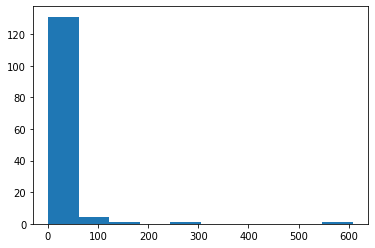

In [239]:
plt.hist(data['reviews_user'].dropna())

In [235]:
temp = data[['minutes', 'ratingValue']].dropna()
print(len(temp))

207


In [1]:
plt.hist(temp['reviews_user'])

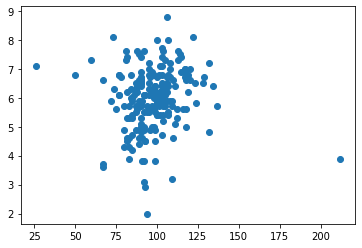

In [236]:
plt.scatter((temp['minutes']), temp['ratingValue'])

In [180]:
[np.nan] * 7

[nan, nan, nan, nan, nan, nan, nan]

In [179]:
[1,2] + list((1,2,3))

[1, 2, 1, 2, 3]

In [18]:
?plt.pcolor

In [25]:
a = np.arange(9)

In [29]:
a = np.resize(a, (3,3))

In [27]:
?np.resize

In [31]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Text(0.5, 0.5, '3')

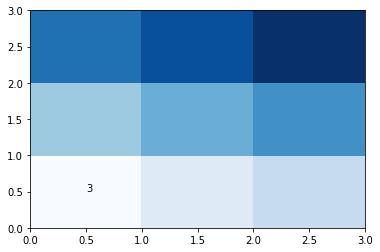

In [35]:
plt.pcolor(a, cmap="Blues")
plt.text(0.5,0.5, '3')

In [37]:
b = np.copy(a)

In [40]:
b[0][2] = 6

In [42]:
b

array([[0, 1, 6],
       [3, 4, 5],
       [6, 7, 8]])

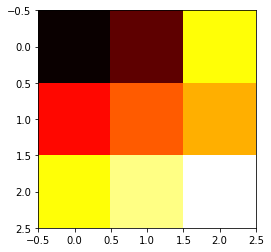

In [46]:
plt.imshow(b, cmap='hot', interpolation='nearest')

<br><br><br><br><br><br><br><br>
## TSNE

In [15]:
from sklearn import manifold
import urllib

In [5]:
headers = {'Accept-Language': 'en',
           'X-FORWARDED-FOR': '2.21.184.0'}

In [6]:
url = 'https://www.imdb.com/search/title/?title_type=feature&release_date=2019-01-01,2019-12-31&user_rating=6.0,10.0&num_votes=1000,&countries=us&languages=en'

In [7]:
response = requests.get(url, headers=headers)
print(response.status_code)

200


In [8]:
soup = BeautifulSoup(response.text)

In [9]:
pics = soup.find_all('img', attrs={'class': 'loadlate'})

In [10]:
pics = [el['loadlate'] for el in pics]

In [11]:
def get_links_to_pics(soup):
    pics = [el['loadlate'] for el in soup.find_all('img', attrs={'class': 'loadlate'})]
    return pics

In [12]:
pics[0]

'https://m.media-amazon.com/images/M/MV5BMGUwZjliMTAtNzAxZi00MWNiLWE2NzgtZGUxMGQxZjhhNDRiXkEyXkFqcGdeQXVyNjU1NzU3MzE@._V1_UX67_CR0,0,67,98_AL_.jpg'

In [20]:
urllib.parse.urlsplit(pics[0]).path

'/images/M/MV5BMGUwZjliMTAtNzAxZi00MWNiLWE2NzgtZGUxMGQxZjhhNDRiXkEyXkFqcGdeQXVyNjU1NzU3MzE@._V1_UX67_CR0,0,67,98_AL_.jpg'

In [293]:
os.path.join('', 'hehe')

'hehe'

In [ ]:
os.path.isdir

In [299]:
def save_image(pic_url, save_dir=''):
    filename = urllib.parse.urlsplit(pic_url).path.split('/')[-1]
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    save_path = os.path.join(save_dir, filename)
    
    with requests.get(pic_url, stream=True) as r:
        with open(save_path, 'wb') as f:
            r.raise_for_status()
            for chunk in r.iter_content():
                f.write(chunk)

In [295]:
save_image(pics[0], 'pics')

In [264]:
pics[0]

'https://m.media-amazon.com/images/M/MV5BMGUwZjliMTAtNzAxZi00MWNiLWE2NzgtZGUxMGQxZjhhNDRiXkEyXkFqcGdeQXVyNjU1NzU3MzE@._V1_UX67_CR0,0,67,98_AL_.jpg'

In [300]:
def download_all_posters(url, save_dir='pics'):
    headers = {'Accept-Language': 'en',
               'X-FORWARDED-FOR': '2.21.184.0'}
    
    
    while True:
        response = requests.get(url, headers=headers)
        assert response.status_code == 200
        soup = BeautifulSoup(response.text)
        pic_links = get_links_to_pics(soup)
        
        for pic in pic_links:
            save_image(pic, save_dir)
        
        link = get_link_to_next_page(soup)
        if not link:
            break
        url = urllib.parse.urljoin(url, link)
        time.sleep(1)

In [301]:
download_all_posters(url)

In [307]:
from imageio import imread

In [ ]:
ls pics

In [ ]:
save_dir = '~/Documents/JupyterNotebooks/projects/pics'
pics = os.listdir(save_dir)

In [ ]:
images_orig = []
images_reshaped = []

for pic in pics:
    try:
        image = imread(os.path.join(save_dir, pic))
        images_orig.append(image)
        image = image.reshape(-1)
        images_reshaped.append(image)
    except:
        print(pic)

In [345]:
images_reshaped = np.array(images_reshaped)
images_orig = np.array(images_orig)

In [346]:
images_orig.shape

(210, 98, 67, 3)

In [327]:
# images.reshape(images.shape[0], -1).shape

In [328]:
# picture = imread(os.path.join(save_dir, pics[0]))

In [323]:
image.reshape(-1).shape

(19698,)

In [313]:
picture.shape

(98, 67, 3)

In [329]:
tsne = manifold.TSNE(n_components=2, init='pca')

In [330]:
X_tsne = tsne.fit_transform(images_reshaped)

In [334]:
X_tsne = X_tsne - X_tsne.min()

In [337]:
X_tsne /= X_tsne.max()

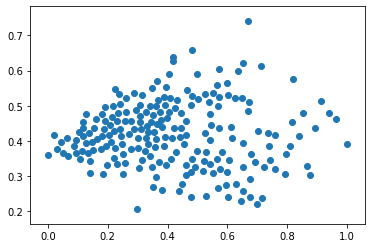

In [340]:
plt.scatter(X_tsne[:,0], X_tsne[:,1])

In [341]:
from matplotlib import offsetbox

In [342]:
i = 0

In [359]:
X_tsne

array([[0.5415387 , 0.40216973],
       [0.02930392, 0.3768192 ],
       [0.12641324, 0.39524746],
       [0.38820228, 0.38495702],
       [0.43982047, 0.25640455],
       [0.6781612 , 0.3634973 ],
       [0.10259023, 0.42509532],
       [0.34760976, 0.3257203 ],
       [0.17722462, 0.37657285],
       [0.3295142 , 0.40745795],
       [0.5737596 , 0.32005748],
       [0.85441077, 0.47905293],
       [0.69097537, 0.34042844],
       [0.4635048 , 0.54440534],
       [0.18134278, 0.47582284],
       [0.12760296, 0.47681394],
       [0.        , 0.36080188],
       [0.37786412, 0.45977706],
       [0.21265045, 0.46854568],
       [0.54339975, 0.47569537],
       [0.15183368, 0.3732276 ],
       [0.57071024, 0.6056857 ],
       [0.1876678 , 0.4346493 ],
       [0.13966548, 0.30710056],
       [0.13483739, 0.36440495],
       [0.10600443, 0.34947348],
       [0.5251181 , 0.4230587 ],
       [0.40796617, 0.5221057 ],
       [0.57101756, 0.52596813],
       [0.33035135, 0.44347483],
       [0.

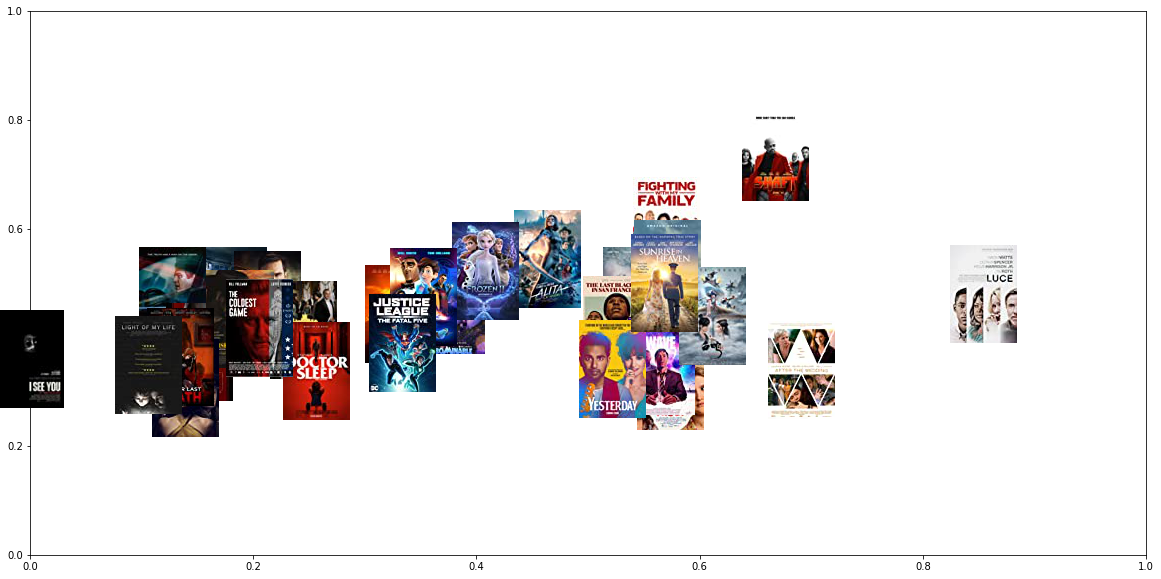

In [368]:
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
for i in range(10,40):
    imagebox = offsetbox.AnnotationBbox(
                offsetbox=offsetbox.OffsetImage(images_orig[i], zoom=1),
                xy=X_tsne[i],
                frameon=False)
    ax.add_artist(imagebox)

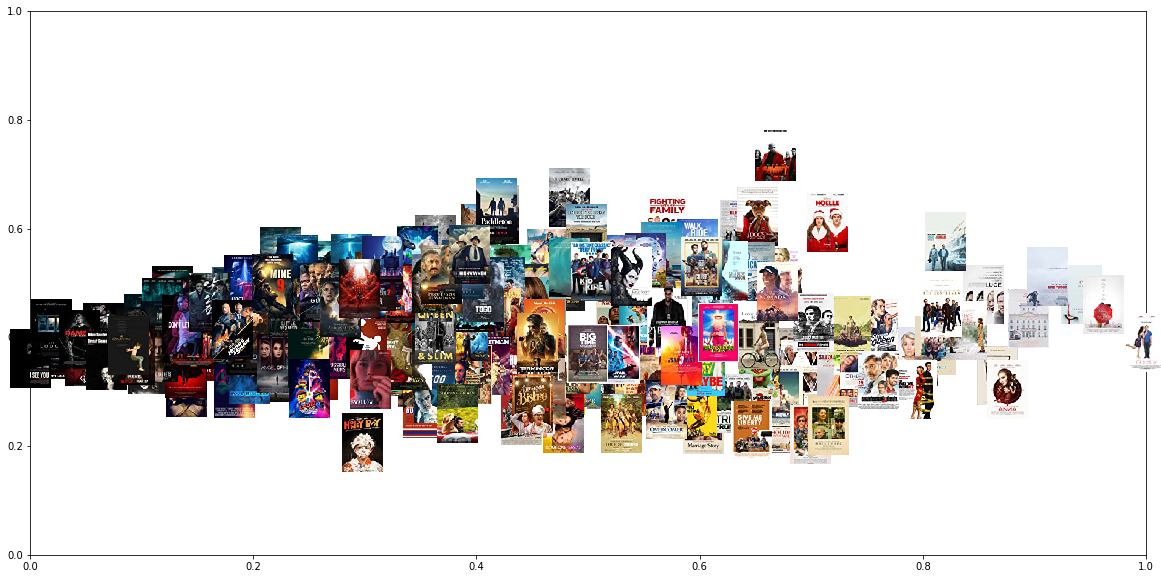

In [361]:
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
for i in range(len(images_orig)):
    imagebox = offsetbox.AnnotationBbox(
                offsetbox=offsetbox.OffsetImage(images_orig[i], zoom=.6),
                xy=X_tsne[i],
                frameon=False)
    ax.add_artist(imagebox)

In [370]:
point = np.array([0.15, 0.4])

In [372]:
def dist(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

In [374]:
dist(point, X_tsne[1])

0.12290196942376964

In [390]:
len(X_tsne)

210

In [391]:
np.random.randint(210)

23

In [375]:
dists = np.array([dist(point, x) for x in X_tsne])

In [385]:
X_copy = X_tsne[inds]

array([[0.12641324, 0.39524746],
       [0.10259023, 0.42509532],
       [0.17722462, 0.37657285],
       [0.15183368, 0.3732276 ],
       [0.1876678 , 0.4346493 ],
       [0.13483739, 0.36440495],
       [0.20531002, 0.41702068],
       [0.15407068, 0.4358809 ],
       [0.11795396, 0.43644044],
       [0.11743803, 0.4133444 ],
       [0.13931377, 0.34273687],
       [0.19390209, 0.38544005],
       [0.16463208, 0.4048077 ],
       [0.09512399, 0.40225333],
       [0.11426266, 0.37182957],
       [0.14611264, 0.3965665 ],
       [0.13645914, 0.42275503],
       [0.18138024, 0.41455293]], dtype=float32)

In [377]:
np.percentile(dists, 10)

0.06427149543220582

In [382]:
inds = np.arange(len(dists))[(dists < 0.06)]

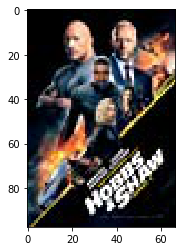

In [392]:
# plt.figure(figsize=(20,10))
# ax = plt.subplot(111)
# for i in inds:
#     imagebox = offsetbox.AnnotationBbox(
#                 offsetbox=offsetbox.OffsetImage(images_orig[i], zoom=0.4),
#                 xy=X_tsne[i],
#                 frameon=False)
#     ax.add_artist(imagebox)

In [393]:
len(X_tsne)

210

In [452]:
rand_int = np.random.randint(210)
print(rand_int)

83


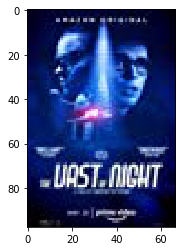

In [453]:
plt.imshow(images_orig[rand_int])

In [454]:
my_point = X_tsne[rand_int]

In [455]:
dists = np.array([dist(my_point, x) for x in X_tsne])

(array([20., 43., 47., 21., 27., 19., 14., 11.,  5.,  3.]),
 array([0.        , 0.0815071 , 0.16301419, 0.24452129, 0.32602839,
        0.40753548, 0.48904258, 0.57054968, 0.65205677, 0.73356387,
        0.81507096]),
 <a list of 10 Patch objects>)

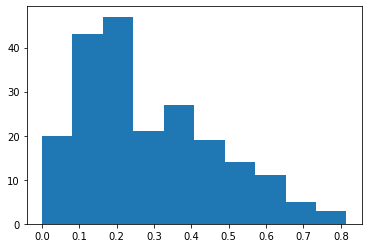

In [456]:
plt.hist(dists)

In [457]:
np.percentile(dists, 1)

0.026202420608870434

In [458]:
inds = np.arange(len(dists))[(dists < 0.06)]
print(len(inds))

12


In [459]:
inds

array([ 14,  18,  44,  58,  69,  83,  94, 101, 153, 168, 184, 186])

In [460]:
# plt.subplot(1,3,i)
# plt.imshow(images_orig[i])

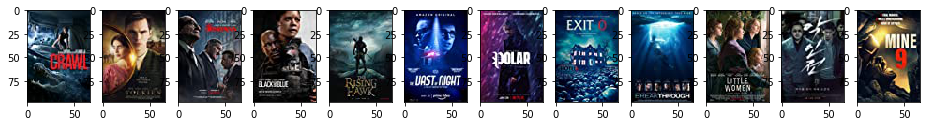

In [461]:
plt.figure(figsize=(16,7))
for i, ind in enumerate(inds):
    #print(i, ind)
    plt.subplot(1,len(inds),i+1)
    plt.imshow(images_orig[ind])